# Data Cleaning and Preparation

In [1]:
# importing necessary libraries
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cardiotocographic.csv to Cardiotocographic.csv


In [3]:
data = pd.read_csv('Cardiotocographic.csv')

In [4]:
# Checking the initial shape of the data
data.shape

(2126, 14)

In [5]:
data.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [6]:
# Find duplicate rows
data[data.duplicated()]

LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   

      Width  Tendency  NSP  
1115   39.0       0.0  1.0  
1458   35.0       0.0  1.0

In [8]:
# Remove duplicates
data = data.drop_duplicates()
data

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2124 rows x 14 columns]

In [9]:
# Checking whether the duplicate rows removed
data.shape

(2124, 14)

In [10]:
# Checking for null values and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2103 non-null   float64
 1   AC        2104 non-null   float64
 2   FM        2124 non-null   float64
 3   UC        2124 non-null   float64
 4   DL        2124 non-null   float64
 5   DS        2103 non-null   float64
 6   DP        2103 non-null   float64
 7   ASTV      2124 non-null   float64
 8   MSTV      2124 non-null   float64
 9   ALTV      2124 non-null   float64
 10  MLTV      2103 non-null   float64
 11  Width     2103 non-null   float64
 12  Tendency  2103 non-null   float64
 13  NSP       2103 non-null   float64
dtypes: float64(14)
memory usage: 248.9 KB


In [11]:
# Null value detection
# Show columnwise null value count
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [12]:
# Null value treatment
# Drop rows that contain less than 3 non-missing values
data = data.dropna()
data

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2103 rows x 14 columns]

In [13]:
# Checking the size of the data after removal of null
data.shape

(2103, 14)

In [14]:
# Checking for any inconsistencies in data types
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [17]:
# Identify outliers
# Calculate Q1 (25 percentile) and Q3 (75 percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Printing outliers
print(outliers)

         LB     AC     FM     UC     DL     DS     DP   ASTV   MSTV   ALTV  \
0     False  False  False  False  False  False  False  False  False   True   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2121  False  False   True  False  False  False  False  False  False  False   
2122  False  False  False  False  False  False  False  False  False  False   
2123  False  False  False  False  False  False  False  False  False  False   
2124  False  False  False  False  False  False  False  False  False  False   
2125  False  False  False  False  False  False  False  False  False   True   

       MLTV  Width  Tendency    NSP  
0     False  False     Fa

In [18]:
# Statistical summary before treating outliers
data.describe()

LB           AC           FM           UC           DL  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean    133.342023     0.003203     0.009973     0.004391     0.001894   
std      11.268266     0.004325     0.067902     0.003350     0.003349   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002559     0.006543     0.003295   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean      0.000003     0.000175    47.013569     1.360968    10.363493   
std       0.000142     0.000840    18.846186     1.173620    21.289827   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2103.000000  2103.000000  2103.000000  2103.000000  
mean      8.280546    70.461052     0.316672     1.304797  
std       7.774969    42.939806     0.645855     0.644857  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.486468     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [19]:
# Data after trimmimg the outliers
data_trimmed = data[~outliers.any(axis=1)]
data_trimmed

LB        AC       FM        UC        DL   DS   DP  ASTV  MSTV  \
1     132.000000  0.006380  0.00000  0.006380  0.003190  0.0  0.0  17.0   2.1   
2     133.000000  0.003322  0.00000  0.008306  0.003322  0.0  0.0  16.0   2.1   
4     131.948232  0.006515  0.00000  0.008143  0.000000  0.0  0.0  16.0   2.4   
37    114.000000  0.004559  0.00000  0.004559  0.003040  0.0  0.0  24.0   3.2   
59    144.000000  0.008143  0.00000  0.006595  0.000000  0.0  0.0  33.0   1.1   
...          ...       ...      ...       ...       ...  ...  ...   ...   ...   
2113  136.000000  0.000000  0.00207  0.008282  0.000000  0.0  0.0  67.0   1.5   
2117  140.000000  0.000000  0.00000  0.007812  0.000000  0.0  0.0  79.0   0.3   
2118  140.000000  0.000000  0.00000  0.006470  0.000898  0.0  0.0  79.0   0.5   
2119  140.000000  0.000000  0.00000  0.006764  0.001127  0.0  0.0  79.0   0.6   
2120  140.000000  0.000000  0.00000  0.004975  0.001244  0.0  0.0  77.0   0.7   

           ALTV  MLTV  Width  Tendency  NSP  
1      0.000000  10.4  130.0  0.000000  1.0  
2      0.000000  13.4  130.0  0.000000  1.0  
4      0.000000  19.9  117.0  1.000000  1.0  
37     0.000000  16.2  134.0  0.000000  1.0  
59    -0.060411   6.2  100.0  1.000000  1.0  
...         ...   ...    ...       ...  ...  
2113  11.000000   4.7   38.0  0.000000  1.0  
2117  20.000000   8.5   26.0  1.002932  1.0  
2118  26.428179   7.0   21.0  1.000000  1.0  
2119  27.000000   6.4   26.0  1.000000  1.0  
2120  17.000000   6.0   31.0  0.000000  1.0  

[883 rows x 14 columns]

In [21]:
# Data after capping the outliers at 5 percentile and 95 percentile
lowerbound = data.quantile(0.05)
upperbound = data.quantile(0.95)
data_capped = data.clip(lower=lowerbound, upper=upperbound, axis = 1)
data_capped

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  21.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  21.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  21.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  21.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.029653  0.007426  0.000000  0.0  0.0  75.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  75.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  75.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  75.0   
2125  142.000000  0.001616  0.000000  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV       MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.400000   64.0  0.999926  2.000000  
1      2.1   0.000000  10.400000  130.0  0.000000  1.000000  
2      2.1   0.000000  13.400000  130.0  0.000000  1.000000  
3      2.4   0.000000  18.612811  117.0  1.000000  1.000000  
4      2.4   0.000000  18.612811  117.0  1.000000  1.000000  
...    ...        ...        ...    ...       ...       ...  
2121   0.3  25.000000   7.200000   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.100000   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.100000   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.000000   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.000000   42.0  0.000000  1.000000  

[2103 rows x 14 columns]

In [23]:
# Data after log transform
data_transformed = np.log1p(data)
data_transformed

LB        AC        FM        UC        DL   DS   DP      ASTV  \
0     4.795791  0.000000  0.000000  0.000000  0.000000  0.0  0.0  4.304065   
1     4.890349  0.006359  0.000000  0.006359  0.003185  0.0  0.0  2.890372   
2     4.897840  0.003317  0.000000  0.008271  0.003317  0.0  0.0  2.833213   
3     4.905275  0.002558  0.000000  0.007712  0.002558  0.0  0.0  2.833213   
4     4.889960  0.006494  0.000000  0.008110  0.000000  0.0  0.0  2.833213   
...        ...       ...       ...       ...       ...  ...  ...       ...   
2121  4.948760  0.000000  0.673591  0.007398  0.000000  0.0  0.0  4.382027   
2122  4.948760  0.000774  0.000000  0.006955  0.000000  0.0  0.0  4.369448   
2123  4.948760  0.000980  0.000000  0.006839  0.000000  0.0  0.0  4.382027   
2124  4.948760  0.000679  0.000000  0.006091  0.000000  0.0  0.0  4.369448   
2125  4.962845  0.001614 -0.000188  0.008045  0.000000  0.0  0.0  4.317488   

          MSTV      ALTV      MLTV     Width  Tendency       NSP  
0     0.405465  3.784190  1.223775  4.174387  0.693110  1.098612  
1     1.131402  0.000000  2.433613  4.875197  0.000000  0.693147  
2     1.131402  0.000000  2.667228  4.875197  0.000000  0.693147  
3     1.223775  0.000000  3.178054  4.770685  0.693147  0.693147  
4     1.223775  0.000000  3.039749  4.770685  0.693147  0.693147  
...        ...       ...       ...       ...       ...       ...  
2121  0.182322  3.258097  2.104134  3.713572  0.000000  1.098612  
2122  0.336472  3.135494  2.091864  4.204693  0.693147  1.098612  
2123  0.336472  3.044522  1.960095  4.219508  0.693147  1.095429  
2124  0.336472  3.332205  2.079442  4.204693  0.693147  1.098612  
2125  0.336472  3.607051  1.791759  3.761200  0.000000  0.693147  

[2103 rows x 14 columns]

# Statistical Summary

In [60]:
# Statistical summary before treating outliers
data.describe()

LB           AC           FM           UC           DL  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean    133.342023     0.003203     0.009973     0.004391     0.001894   
std      11.268266     0.004325     0.067902     0.003350     0.003349   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002559     0.006543     0.003295   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean      0.000003     0.000175    47.013569     1.360968    10.363493   
std       0.000142     0.000840    18.846186     1.173620    21.289827   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2103.000000  2103.000000  2103.000000  2103.000000  
mean      8.280546    70.461052     0.316672     1.304797  
std       7.774969    42.939806     0.645855     0.644857  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.486468     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [20]:
# Statistical summary after trimmimg outliers
data_trimmed.describe()

LB          AC          FM          UC          DL     DS  \
count  883.000000  883.000000  883.000000  883.000000  883.000000  883.0   
mean   131.839223    0.004098    0.000603    0.004965    0.001545    0.0   
std      9.442301    0.003753    0.001337    0.002713    0.002218    0.0   
min    106.000000   -0.000122   -0.002467   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003137    0.000000    0.0   
50%    133.000000    0.003358    0.000000    0.005061    0.000000    0.0   
75%    138.000000    0.006748    0.000336    0.006931    0.003084    0.0   
max    160.000000    0.014068    0.006272    0.012072    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  883.0  883.000000  883.000000  883.000000  883.000000  883.000000   
mean     0.0   42.418248    1.270801    3.170071    8.585997   67.827442   
std      0.0   15.075988    0.538126    6.036208    4.498020   32.584672   
min      0.0   15.000000    0.300000   -1.043619   -0.136053   12.000000   
25%      0.0   29.000000    0.900000    0.000000    5.600000   41.000000   
50%      0.0   41.000000    1.200000    0.000000    8.500000   61.000000   
75%      0.0   56.000000    1.600000    4.000000   11.400000   92.408185   
max      0.0   79.000000    3.200000   27.000000   20.000000  176.310998   

         Tendency    NSP  
count  883.000000  883.0  
mean     0.338671    1.0  
std      0.588830    0.0  
min     -1.006614    1.0  
25%      0.000000    1.0  
50%      0.000000    1.0  
75%      1.000000    1.0  
max      1.023635    1.0

In [22]:
# Statistical summary after capping outliers
data_capped.describe()

LB           AC           FM           UC           DL  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean    133.373368     0.003064     0.003541     0.004308     0.001794   
std       8.921940     0.003572     0.007578     0.002849     0.002674   
min     119.000000     0.000000     0.000000     0.000000     0.000000   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002559     0.006543     0.003295   
max     149.000000     0.011063     0.029653     0.009287     0.008414   

           DS           DP         ASTV         MSTV         ALTV  \
count  2103.0  2103.000000  2103.000000  2103.000000  2103.000000   
mean      0.0     0.000119    46.978248     1.296800     9.536531   
std       0.0     0.000396    16.669173     0.753003    16.857738   
min       0.0     0.000000    21.000000     0.300000     0.000000   
25%       0.0     0.000000    32.000000     0.700000     0.000000   
50%       0.0     0.000000    49.000000     1.200000     0.000000   
75%       0.0     0.000000    61.000000     1.700000    11.000000   
max       0.0     0.001574    75.000000     3.000000    58.000000   

              MLTV        Width     Tendency          NSP  
count  2103.000000  2103.000000  2103.000000  2103.000000  
mean      7.955840    70.087553     0.318528     1.306871  
std       4.900672    37.651059     0.614606     0.616483  
min       0.000000    16.000000    -1.000000     1.000000  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.486468     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max      18.612811   138.000000     1.000000     3.000000

In [24]:
# Statistical summary after transforming outliers
data_transformed.describe()

LB           AC           FM           UC           DL  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean      4.896726     0.003189     0.008004     0.004375     0.001887   
std       0.087465     0.004294     0.060711     0.003330     0.003332   
min       3.967316    -0.019472    -0.655146    -0.015038    -0.015513   
25%       4.844187     0.000000     0.000000     0.001836     0.000000   
50%       4.897840     0.001630     0.000000     0.004474     0.000000   
75%       4.948760     0.005634     0.002556     0.006522     0.003289   
max       5.370638     0.037842     0.673591     0.029561     0.030305   

                DS           DP         ASTV         MSTV         ALTV  \
count  2103.000000  2103.000000  2098.000000  2100.000000  2099.000000   
mean      0.000003     0.000175     3.799769     0.791854     1.153332   
std       0.000142     0.000838     0.408158     0.356748     1.535806   
min      -0.001354    -0.005362     2.549433     0.182322    -2.301291   
25%       0.000000     0.000000     3.496508     0.530628     0.000000   
50%       0.000000     0.000000     3.912023     0.788457     0.000000   
75%       0.000000     0.000000     4.127134     0.993252     2.484907   
max       0.002703     0.010638     5.093750     2.694627     5.209486   

              MLTV        Width     Tendency          NSP  
count  2098.000000  2098.000000  2089.000000  2102.000000  
mean      1.996439     4.082829         -inf         -inf  
std       0.776657     0.675045          NaN          NaN  
min      -0.224129     1.386294         -inf         -inf  
25%       1.722767     3.637586     0.000000     0.693147  
50%       2.128232     4.234107     0.000000     0.693147  
75%       2.476538     4.615121     0.693147     0.693147  
max       4.628887     5.880533     1.386294     1.791759

In [32]:
# Interquartile range of data before treating the outliers
IQR = data.quantile(0.75) - data.quantile(0.25)
print(IQR)

LB          14.000000
AC           0.005650
FM           0.002559
UC           0.004705
DL           0.003295
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


In [33]:
# Interquartile range of data after trimming the outliers
IQR = data_trimmed.quantile(0.75) - data_trimmed.quantile(0.25)
print(IQR)

LB          13.000000
AC           0.006748
FM           0.000336
UC           0.003794
DL           0.003084
DS           0.000000
DP           0.000000
ASTV        27.000000
MSTV         0.700000
ALTV         4.000000
MLTV         5.800000
Width       51.408185
Tendency     1.000000
NSP          0.000000
dtype: float64


In [34]:
# Interquartile range of data after capping the outliers
IQR = data_capped.quantile(0.75) - data_capped.quantile(0.25)
print(IQR)

LB          14.000000
AC           0.005650
FM           0.002559
UC           0.004705
DL           0.003295
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


In [35]:
# Interquartile range of data after transformimg the outliers
IQR = data_transformed.quantile(0.75) - data_transformed.quantile(0.25)
print(IQR)

LB          0.104573
AC          0.005634
FM          0.002556
UC          0.004685
DL          0.003289
DS          0.000000
DP          0.000000
ASTV        0.630627
MSTV        0.462624
ALTV        2.484907
MLTV        0.753772
Width       0.977534
Tendency    0.693147
NSP         0.000000
dtype: float64


In [25]:
# Statistical summary before treating outliers
data.describe()

LB           AC           FM           UC           DL  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean    133.342023     0.003203     0.009973     0.004391     0.001894   
std      11.268266     0.004325     0.067902     0.003350     0.003349   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002559     0.006543     0.003295   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2103.000000  2103.000000  2103.000000  2103.000000  2103.000000   
mean      0.000003     0.000175    47.013569     1.360968    10.363493   
std       0.000142     0.000840    18.846186     1.173620    21.289827   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2103.000000  2103.000000  2103.000000  2103.000000  
mean      8.280546    70.461052     0.316672     1.304797  
std       7.774969    42.939806     0.645855     0.644857  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.486468     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [ ]:
# interesting findings from this summary
'''Wide Range of Values:
The variable LB (likely a key variable) ranges from 51.84 to 214, showing a very wide range.
Similarly, ASTV ranges from -63 to 162, and MLTV ranges from -50.7 to 101.4. These wide ranges indicate high variability and the presence of extreme values.

Negative Values:
Variables such as AC, FM, UC, DL, DS, DP, and Tendency contain negative values, which may be erroneous as these variables are likely expected to be non-negative.
For instance, AC has a minimum value of -0.0193, FM of -0.4806, UC of -0.0149, DL of -0.0154, DS of -0.0014, DP of -0.0053, and Tendency of -3.0.

High Standard Deviation:
Variables such as LB, ASTV, MLTV, and Width have high standard deviations (11.27, 18.85, 7.77, and 42.94 respectively), indicating that the data points are widely spread from the mean.
High variability is often a sign of the presence of outliers.

Central Tendency:
The mean of LB is 133.34, while the median is 133. This close proximity suggests that LB is relatively normally distributed.
However, the mean of FM (0.009973) is much higher than the median (0.000000), indicating a right-skewed distribution with possible outliers on the higher end.

Extreme Outliers:
The maximum values for some variables are extremely high compared to the 75th percentile, suggesting the presence of extreme outliers. For example:
FM has a maximum value of 0.9613, while the 75th percentile is 0.0026.
MLTV has a maximum value of 101.4, while the 75th percentile is 10.9.
Width has a maximum value of 357, while the 75th percentile is 100.

Data Quality Issues:
The presence of negative values and extreme outliers highlights potential data quality issues that need to be addressed to improve the reliability of the analysis.
'''

# Data Visualization

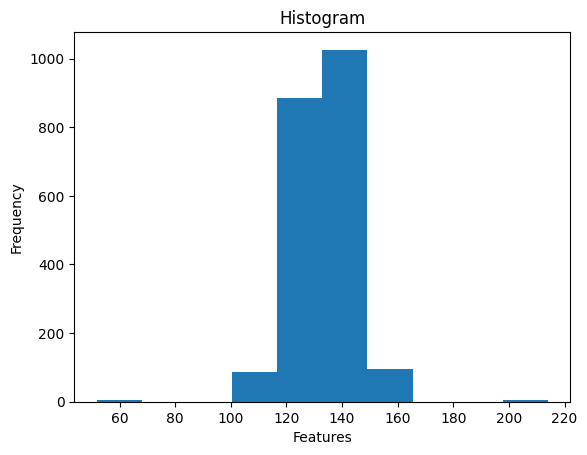

In [29]:
# Histogram
# Visualizing distribution of data of variable LB
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['LB'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

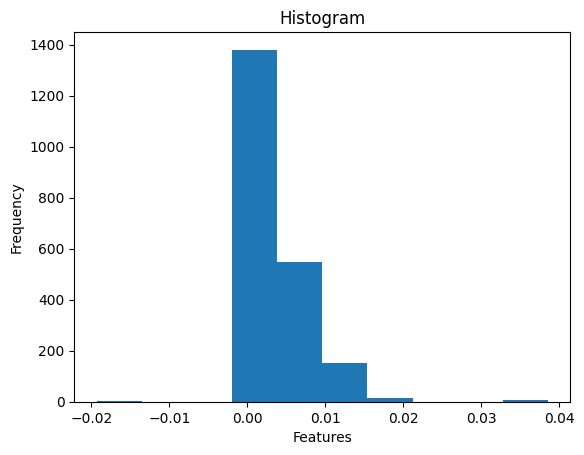

In [30]:
# Histogram
# Visualizing distribution of data of variable AC
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['AC'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

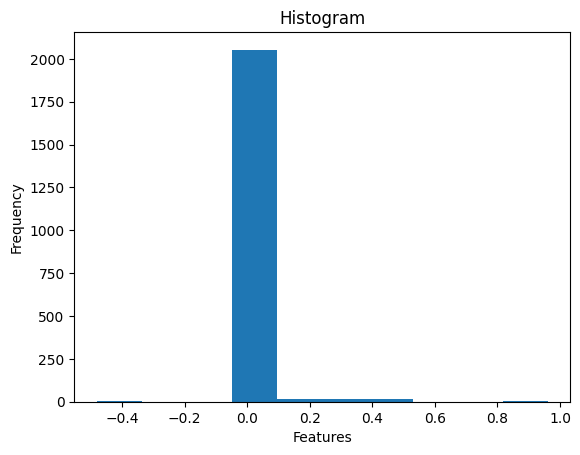

In [31]:
# Histogram
# Visualizing distribution of data of variable FM
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['FM'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

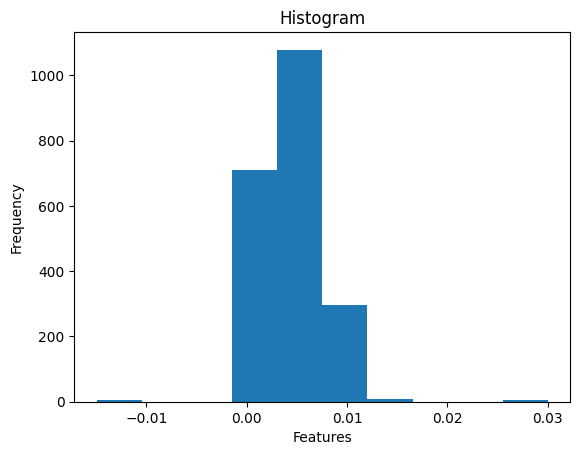

In [32]:
# Histogram
# Visualizing distribution of data of variable UC
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['UC'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

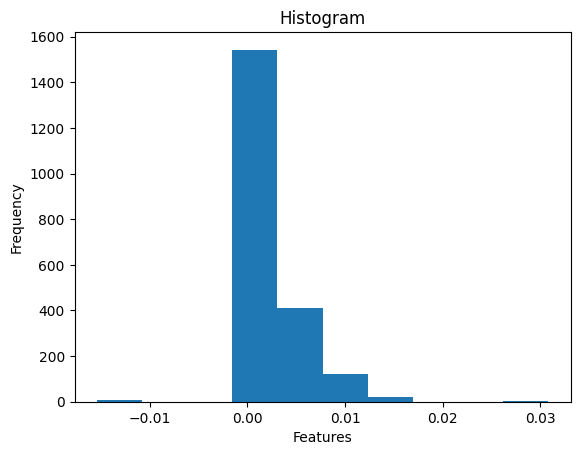

In [33]:
# Histogram
# Visualizing distribution of data of variable DL
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['DL'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

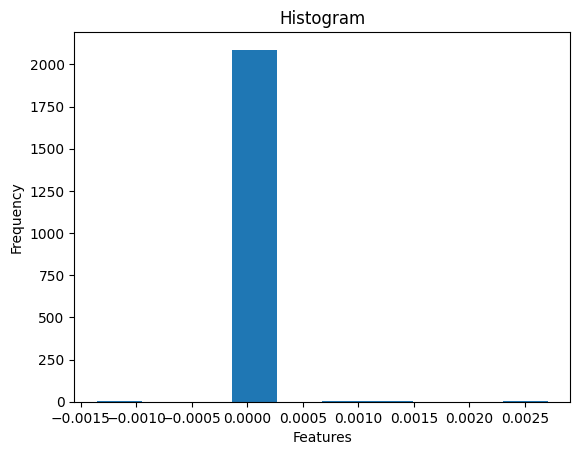

In [34]:
# Histogram
# Visualizing distribution of data of variable DS
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['DS'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

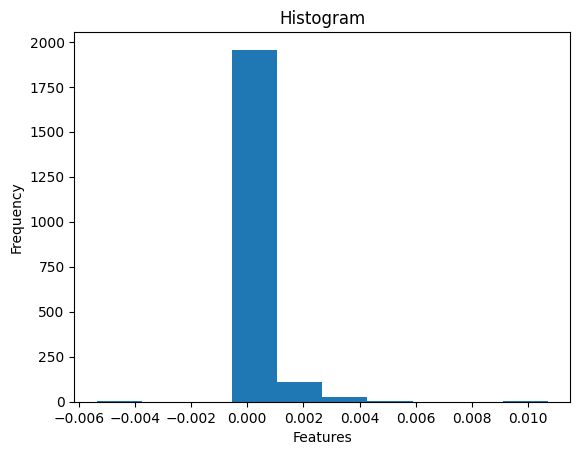

In [35]:
# Histogram
# Visualizing distribution of data of variable DP
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['DP'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

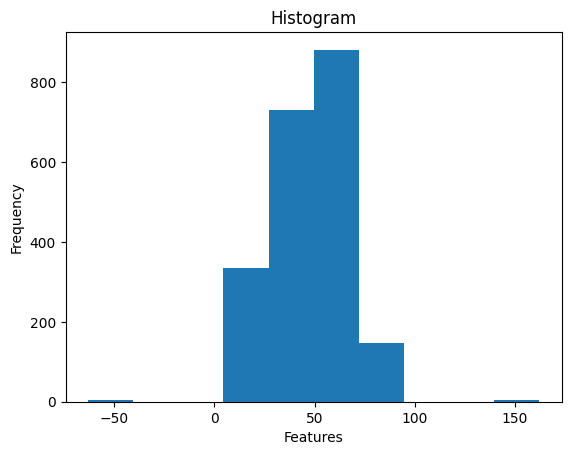

In [36]:
# Histogram
# Visualizing distribution of data of variable ASTV	MSTV	ALTV	MLTV	Width	Tendency	NSP
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['ASTV'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

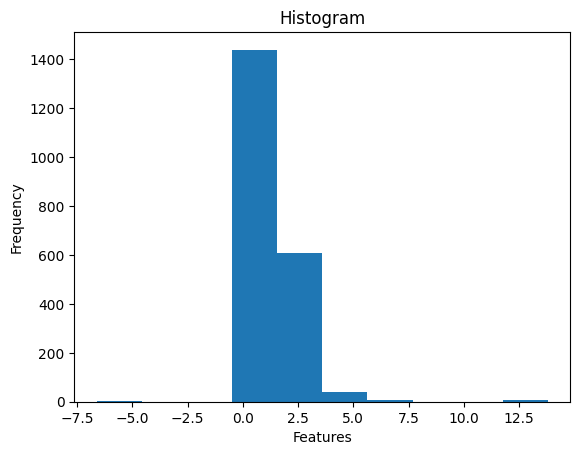

In [37]:
# Histogram
# Visualizing distribution of data of variable MSTV
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['MSTV'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

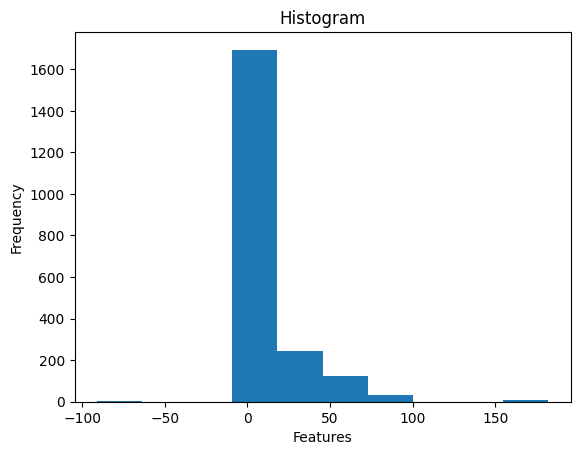

In [39]:
# Histogram
# Visualizing distribution of data of variable ALTV
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['ALTV'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

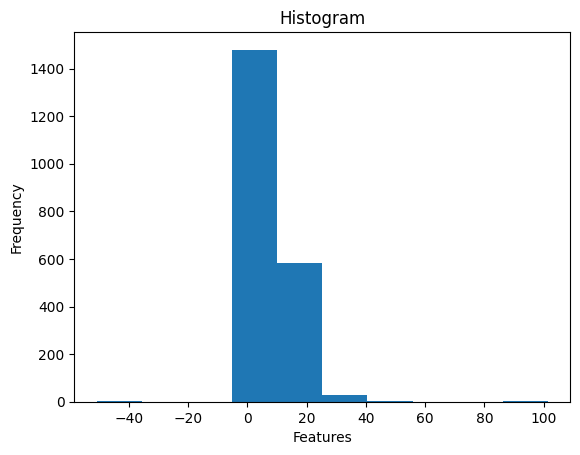

In [40]:
# Histogram
# Visualizing distribution of data of variable MLTV
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['MLTV'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

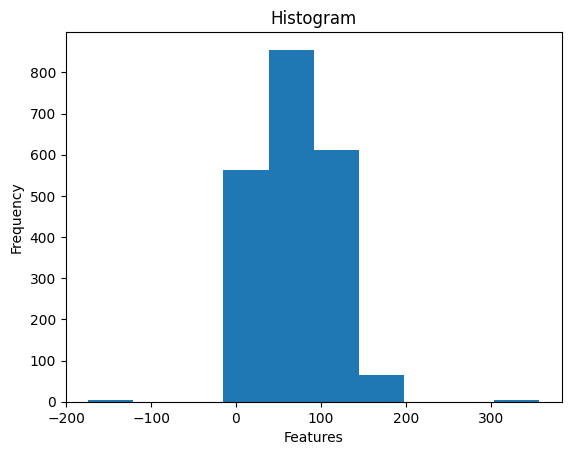

In [43]:
# Histogram
# Visualizing distribution of data of variable Width
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['Width'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

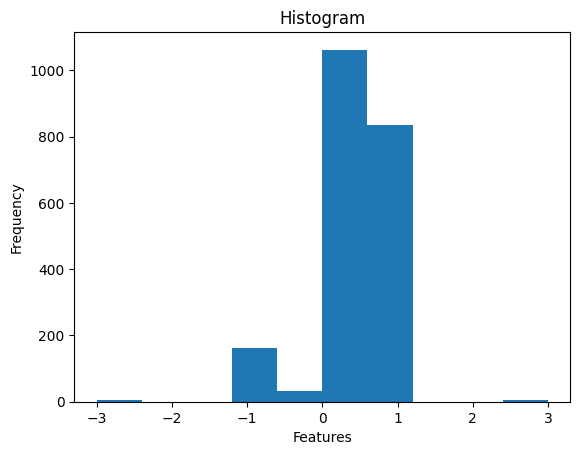

In [44]:
# Histogram
# Visualizing distribution of data of variable Tendency
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['Tendency'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

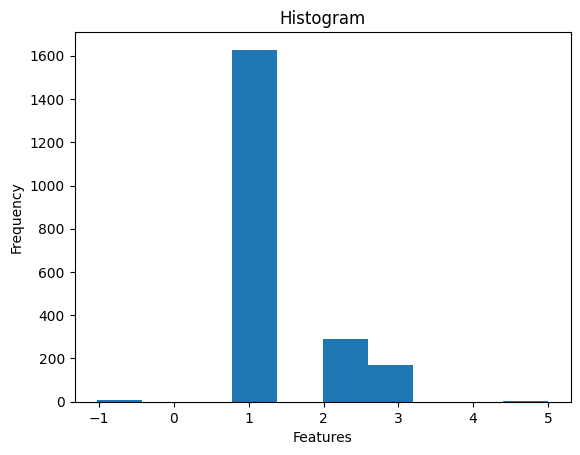

In [41]:
# Histogram
# Visualizing distribution of data of variable NSP
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['NSP'])
plt.title('Histogram')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.show()

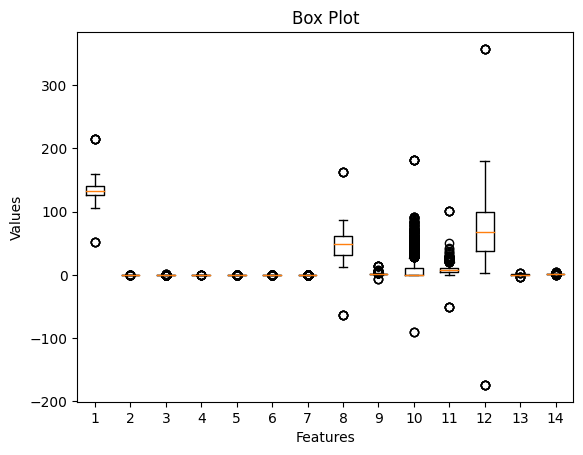

In [27]:
# Box plot
# Visualizing outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(data)
plt.title('Box Plot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [50]:
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

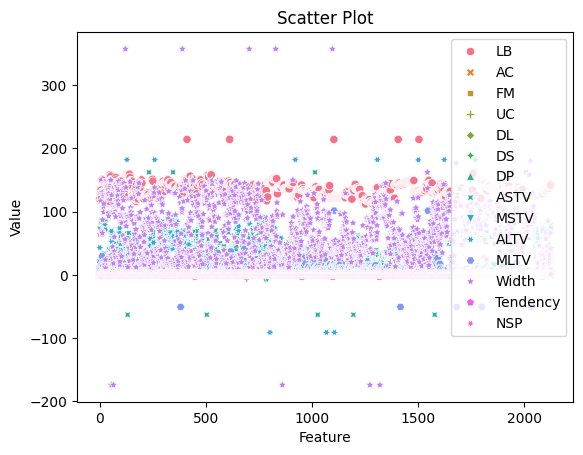

In [53]:
# Scatter plot
# Exploring relationships between pairs of variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data)
plt.title('Scatter Plot')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

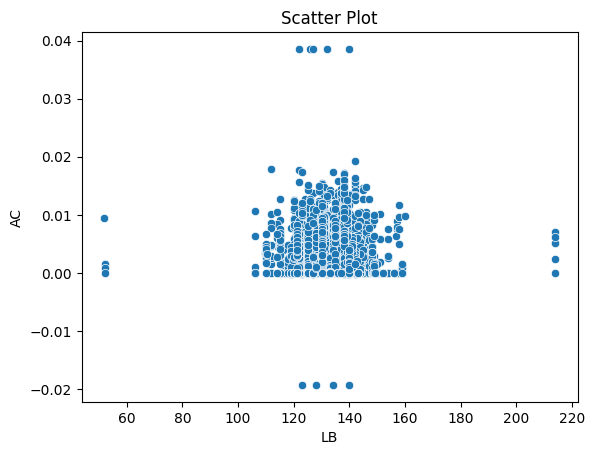

In [52]:
# Scatter plot
# Exploring relationships between pairs of variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data, x = 'LB', y = 'AC')
plt.title('Scatter Plot')
plt.xlabel('LB')
plt.ylabel('AC')
plt.show()

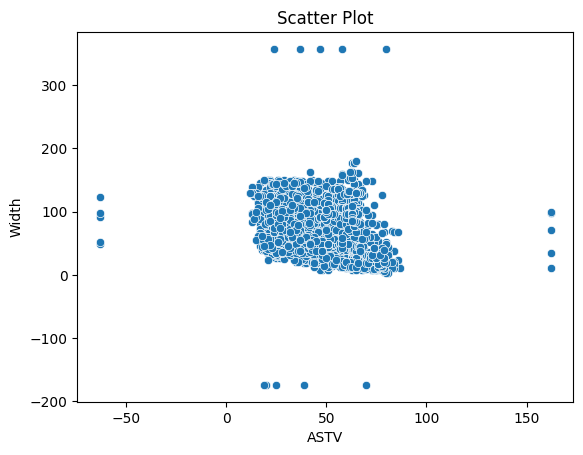

In [54]:
# Scatter plot
# Exploring relationships between pairs of variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data, x = 'ASTV', y = 'Width')
plt.title('Scatter Plot')
plt.xlabel('ASTV')
plt.ylabel('Width')
plt.show()

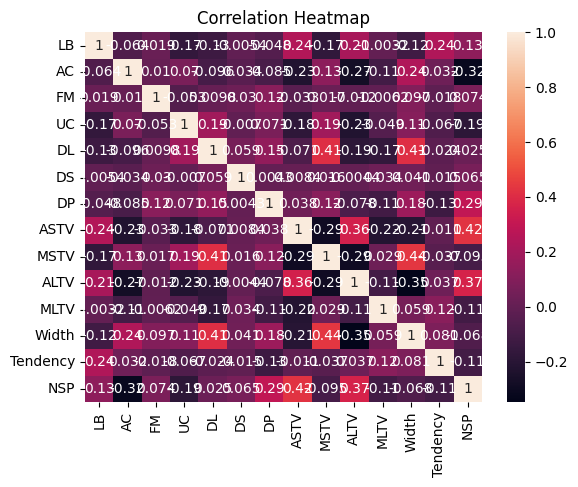

In [55]:
# Correlation Heatmap
# exploring relationships between pairs of variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

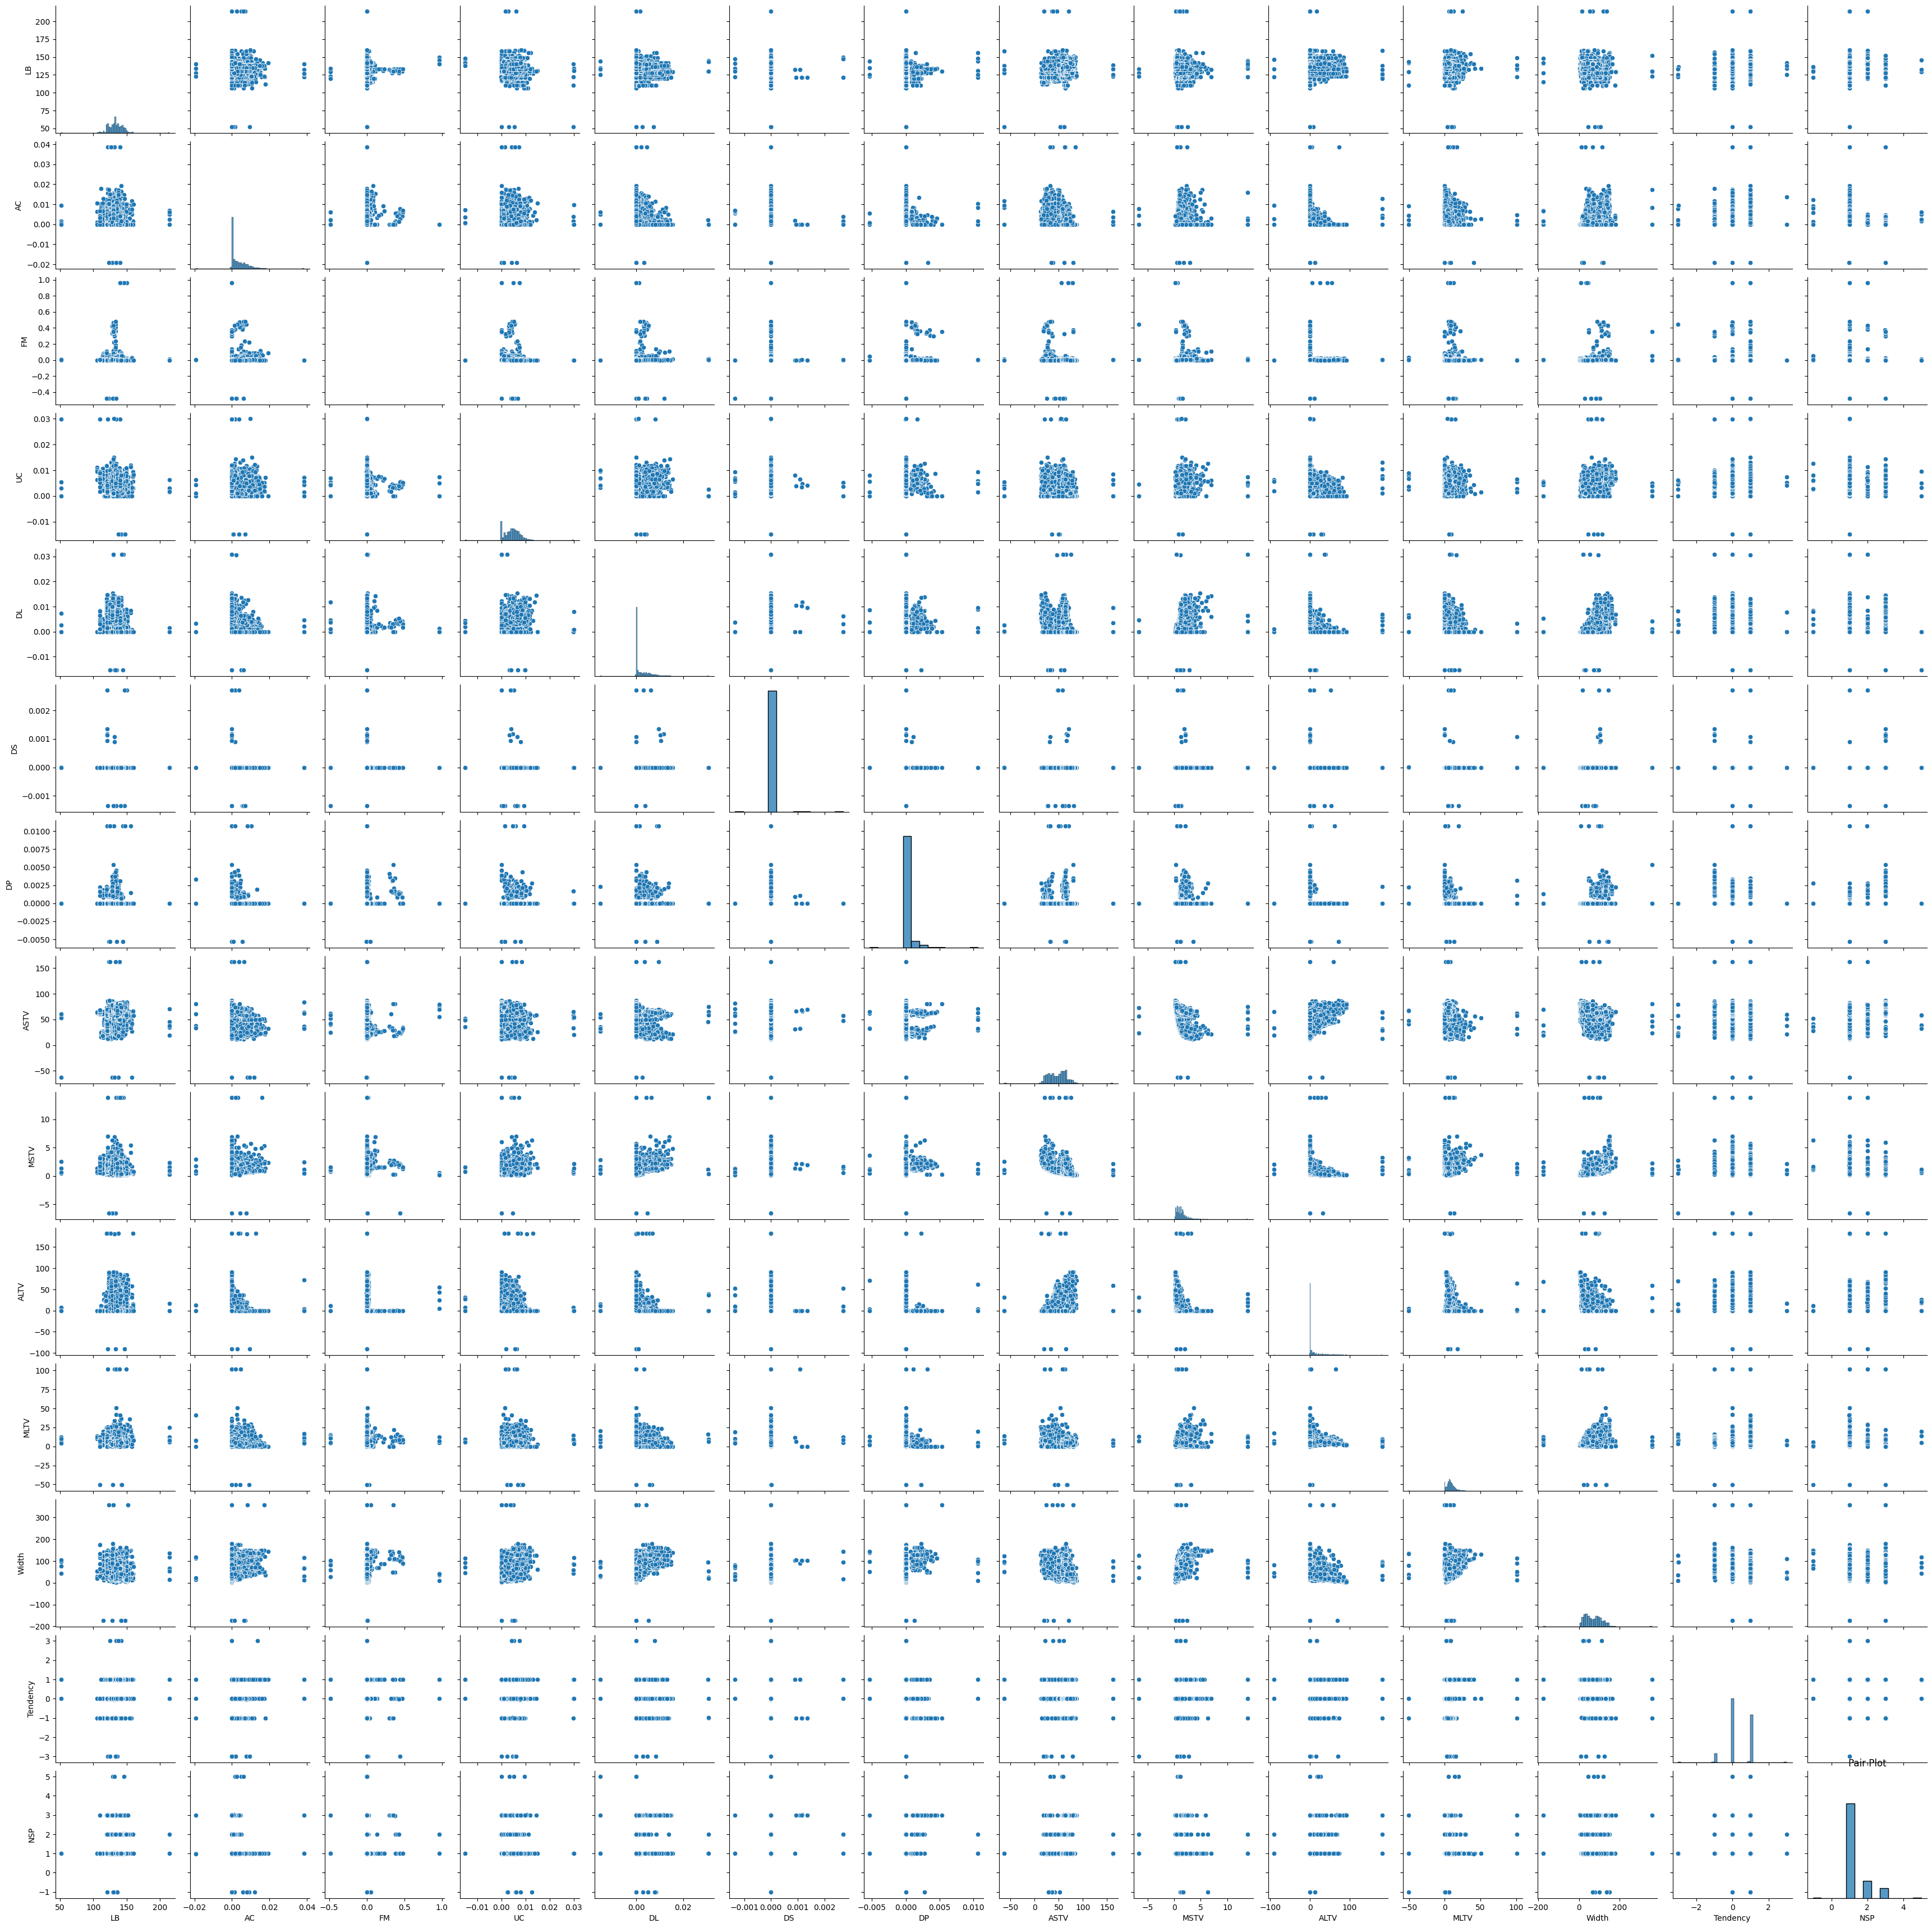

In [56]:
# Pair plot
# for deeper insights
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data)
plt.title('Pair Plot')
plt.show()

Text(0.5, 0, 'Feature')

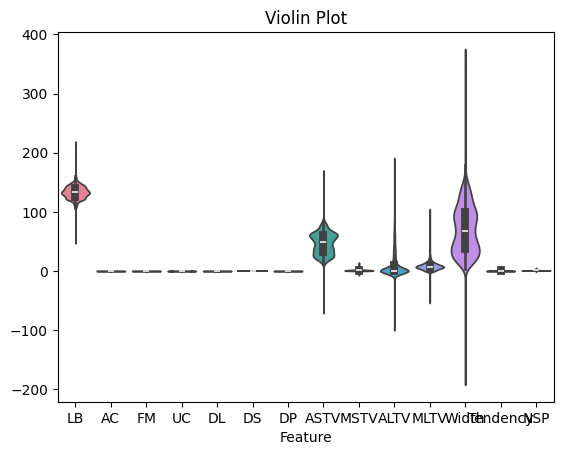

In [57]:
# Violin plot
# for deeper insights
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(data)
plt.title('Violin Plot')
plt.xlabel('Feature')

# Pattern Recognition and Insights:

In [59]:
# Correlation matrix
data.corr()

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.064452  0.018810 -0.167012 -0.126981 -0.005439   
AC       -0.064452  1.000000  0.010127  0.069820 -0.095626 -0.033632   
FM        0.018810  0.010127  1.000000 -0.053139  0.009753  0.029899   
UC       -0.167012  0.069820 -0.053139  1.000000  0.191473 -0.006957   
DL       -0.126981 -0.095626  0.009753  0.191473  1.000000  0.058625   
DS       -0.005439 -0.033632  0.029899 -0.006957  0.058625  1.000000   
DP       -0.047726 -0.084644  0.121259  0.070504  0.145338  0.004282   
ASTV      0.242435 -0.231114 -0.032931 -0.182358 -0.071342  0.008441   
MSTV     -0.170134  0.127010  0.017488  0.190295  0.410270  0.016165   
ALTV      0.210955 -0.274055 -0.012345 -0.228399 -0.186882 -0.004406   
MLTV     -0.003225 -0.106308 -0.006157 -0.048862 -0.165494  0.034366   
Width    -0.118375  0.238422  0.097133  0.106787  0.409793  0.040831   
Tendency  0.237112  0.032399 -0.018410 -0.067098 -0.023838 -0.015408   
NSP       0.132008 -0.317113  0.073997 -0.185953  0.025179  0.065399   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.047726  0.242435 -0.170134  0.210955 -0.003225 -0.118375   
AC       -0.084644 -0.231114  0.127010 -0.274055 -0.106308  0.238422   
FM        0.121259 -0.032931  0.017488 -0.012345 -0.006157  0.097133   
UC        0.070504 -0.182358  0.190295 -0.228399 -0.048862  0.106787   
DL        0.145338 -0.071342  0.410270 -0.186882 -0.165494  0.409793   
DS        0.004282  0.008441  0.016165 -0.004406  0.034366  0.040831   
DP        1.000000  0.038076  0.119911 -0.077865 -0.113993  0.175240   
ASTV      0.038076  1.000000 -0.293322  0.357478 -0.219922 -0.208439   
MSTV      0.119911 -0.293322  1.000000 -0.291405  0.028807  0.435563   
ALTV     -0.077865  0.357478 -0.291405  1.000000 -0.107475 -0.346960   
MLTV     -0.113993 -0.219922  0.028807 -0.107475  1.000000  0.059031   
Width     0.175240 -0.208439  0.435563 -0.346960  0.059031  1.000000   
Tendency -0.130510 -0.011367 -0.036849  0.036552  0.116672  0.081025   
NSP       0.294416  0.422515 -0.095143  0.365708 -0.113445 -0.067799   

          Tendency       NSP  
LB        0.237112  0.132008  
AC        0.032399 -0.317113  
FM       -0.018410  0.073997  
UC       -0.067098 -0.185953  
DL       -0.023838  0.025179  
DS       -0.015408  0.065399  
DP       -0.130510  0.294416  
ASTV     -0.011367  0.422515  
MSTV     -0.036849 -0.095143  
ALTV      0.036552  0.365708  
MLTV      0.116672 -0.113445  
Width     0.081025 -0.067799  
Tendency  1.000000 -0.106481  
NSP      -0.106481  1.000000

In [ ]:
# Correlation  between variables and thier potential implications
'''Positive Correlations:
LB and ASTV: There is a moderate positive correlation (0.242).
LB and ALTV: There is a moderate positive correlation (0.211).
LB and Tendency: There is a moderate positive correlation (0.237).
ASTV and NSP: There is a strong positive correlation (0.423).
ALTV and NSP: There is a strong positive correlation (0.366).
DP and NSP: There is a moderate positive correlation (0.294).
Width and MSTV: There is a strong positive correlation (0.436).

Negative Correlations:
AC and NSP: There is a strong negative correlation (-0.317).
MSTV and ASTV: There is a moderate negative correlation (-0.293).
ASTV and ALTV: There is a moderate negative correlation (-0.293).

Implications:
The positive correlation between ASTV and NSP suggests that higher ASTV values might be associated with higher NSP values. This could imply that ASTV is a strong predictor of NSP.
The strong negative correlation between AC and NSP indicates that as AC increases, NSP tends to decrease. This inverse relationship could be crucial in understanding the impact of AC on NSP.
The positive correlation between Width and MSTV could suggest that increases in Width are associated with increases in MSTV, which might be relevant in studies related to physical dimensions or measurements.'''

In [61]:
'''Look for Trends or Patterns Over Time
Since the provided data does not include explicit temporal information, direct time-based trends cannot be identified. '''

'Look for Trends or Patterns Over Time\nSince the provided data does not include explicit temporal information, direct time-based trends cannot be identified. '

# Conclusion

In [ ]:
'''Key Insights

Important Predictors:
ASTV and ALTV have strong positive correlations with NSP, making them important predictors for determining the status (Normal, Suspect, Pathologic).
AC has a strong negative correlation with NSP, indicating its significance in identifying normal status.

Inter-variable Relationships:
The strong correlation between Width and MSTV suggests a close relationship between uterine contraction width and short-term variability, which might be clinically relevant.
Impact on Decision-Making

Predictive Modeling:
The insights from the correlations can improve predictive models for NSP. By focusing on key predictors like ASTV, ALTV, and AC, models can become more accurate.
Understanding the negative impact of AC on NSP can help in identifying normal cases more effectively.

Clinical Interventions:
Knowing the key predictors can help clinicians monitor critical variables more closely and intervene when necessary to prevent adverse outcomes.
Further analysis of the relationships between variables can provide deeper insights into the mechanisms affecting fetal health, leading to better clinical guidelines and treatment strategies.'''